In [7]:
import os
import numpy as np
from io import BytesIO
import tempfile

#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
import lsst.geom
import lsst.alert.packet
afwDisplay.setDefaultBackend('matplotlib')
import matplotlib.ticker as plticker
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)

In [3]:
schema = lsst.alert.packet.Schema.from_file('/project/ebellm/sample-avro-alert/schema/2/1/lsst.alert.avsc')

In [4]:
with open('hits_alert_packets/test.avro','rb') as f:
    writer_schema, data = schema.retrieve_alerts(f)

In [6]:
len(data)

30

In [10]:
afwImage.ExposureF(cutout)

/opt/lsst/software/stack/python/miniconda3-4.7.12/envs/lsst-scipipe-984c9f7/lib/python3.7/site-packages/ipykernel/__main__.py:1: Warning: Failed to translate C++ Exception to Python.
  if __name__ == '__main__':


SystemError: <built-in method __init__ of PyCapsule object at 0x7f33f62f2d20> returned NULL without setting an error

In [73]:
def make_cutout_images(alert):
    # writeFits seems to want filenames, not file pointers
    temp = tempfile.NamedTemporaryFile()
    diffCutout = alert['cutoutDifference']['stampData']
    with open(temp.name,'wb') as f:
        f.write(diffCutout)
    
    diffExposure = afwImage.ExposureF(temp.name)
    
    fig = plt.figure()                                     
    afw_display = afwDisplay.Display()               
    afw_display.scale('asinh', 'zscale')            
    #afw_display.setMaskTransparency(90)  
    afw_display.setMaskTransparency(100)  
    afw_display.setMaskPlaneColor('DETECTED','blue') 
    afw_display.mtv(diffExposure)                          
    plt.savefig(f"hits_alert_stamp_images/{alert['diaSource']['diaSourceId']}_diff.png")
    #plt.show() 
    plt.close(fig)

    
    #return diffExposure

In [80]:
import lsst.afw.fits as afwFits
mm = afwFits.MemFileManager(len(alert['cutoutDifference']['stampData']))
mm.setData(alert['cutoutDifference']['stampData'],len(alert['cutoutDifference']['stampData']))
afwImage.ExposureF(mm)

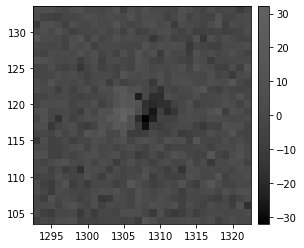

In [74]:
make_cutout_images(data[4])

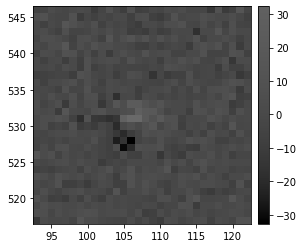

In [70]:
for alert in data:
    make_cutout_images(alert)